# Solving Gomoku With a Small Budget

## DDPG + Heuristics + Policy-advised Minimax Treesearch

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
from domoku import data
from domoku.ddpg import Trainer
from domoku.policies.softadvice import MaxInfluencePolicyParams, MaxInfluencePolicy
from domoku.policies.maximal_criticality import MaxCriticalityPolicy
from domoku.tools import GomokuTools as gt
from domoku.board import GomokuBoard

In [2]:
SIZE=15

In [5]:
hard_policy = MaxCriticalityPolicy(SIZE, overconfidence=2)

params = MaxInfluencePolicyParams(
    n=15,
    sigma=.7,
    iota=3,
    radial_constr = [.0625, .125, .25, .5],
    radial_obstr = [-.0625, -.125, -.25, -.5]
)
heuristics = MaxInfluencePolicy(params, criticality_model=hard_policy)
initial_state = data.create_nxnx4(size=SIZE, stones=[('H', 8)])
trainer = Trainer(heuristics)

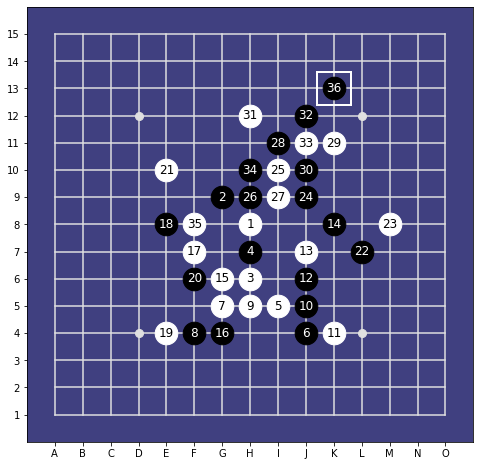

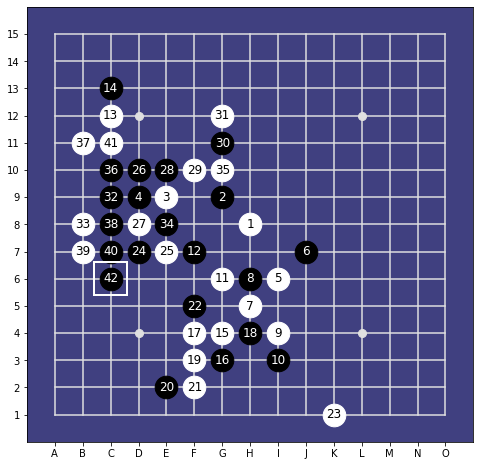

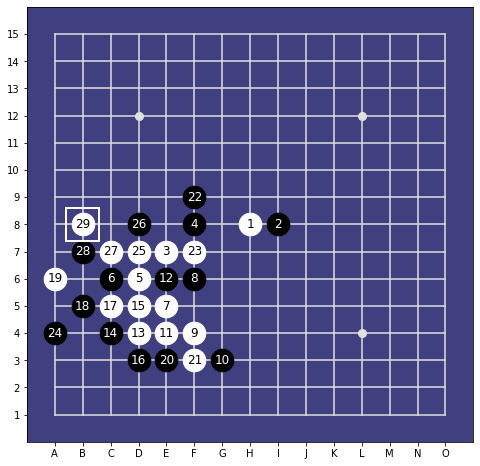

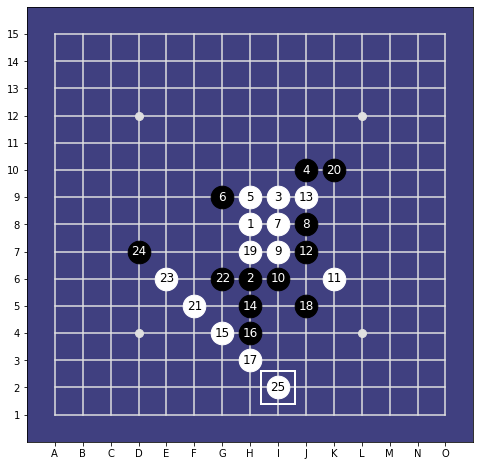

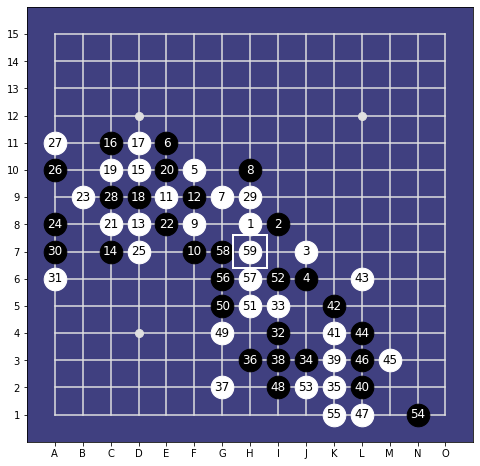

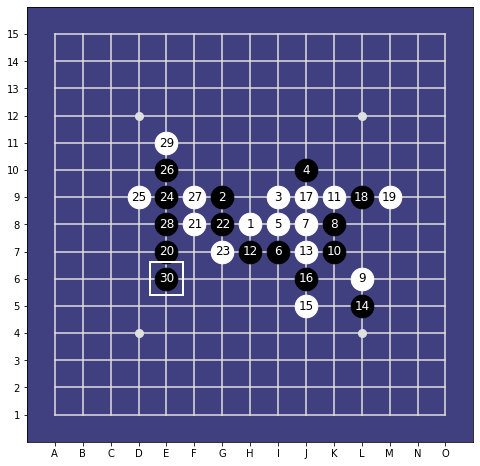

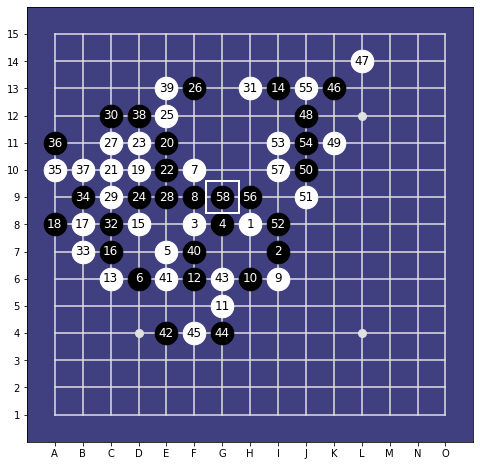

In [7]:
NUM_TRAJECTORIES = 10
trajectories = trainer.create_trajectories(num_trajectories=NUM_TRAJECTORIES, max_length=80,
                                           initial_state=initial_state, terminal=True)

for i in range(10):
    if trajectories[i] is not None:
        moves = [gt.m2b(t[0], SIZE) for  t in trajectories[i][1:]]
        board = GomokuBoard(SIZE, disp_width=8, stones=[('H', 8)] + moves)
        board.display()